# Linear regression

다음 데이터는 442명의 당뇨병 환자의 데이터 입니다.

In [13]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import regression
import itertools

In [14]:
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data)
data.columns = diabetes.feature_names
data["progress"] = diabetes.target
print(data.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  progress  
0 -0.002592  0.019908 -0.017646     151.0  
1 -0.039493 -0.068330 -0.092204      75.0  
2 -0.002592  0.002864 -0.025930     141.0  
3  0.034309  0.022692 -0.009362     206.0  
4 -0.002592 -0.031991 -0.046641     135.0  


비만과 당뇨병진행 사이의 관계를 알아보려합니다. 분석을 위해 X변수에는 BMI 지수를, Y변수에는 progress 지수를 입력한 후, scatter plot을 그리세요.

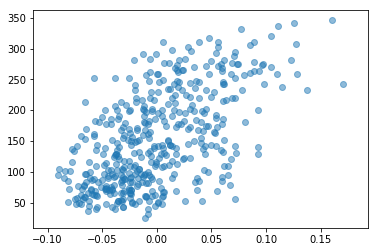

In [25]:
X = data['bmi']
Y = data['progress']
plt.scatter(X, Y, alpha = 0.3)
plt.show()

저장된 X와 Y변수에 대하여 Linear regression을 적용하세요. Hint : 실습 시간 자료에서 만든 linreg함수를 이용하세요.

In [16]:
def linreg(X,Y):
    # Running the linear regression
    X1 = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X1).fit()
    a = model.params[0]
    b = model.params[1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    #plt.xlabel('X Value')
    #plt.ylabel('Y Value')
    plt.show()
    return model.summary()

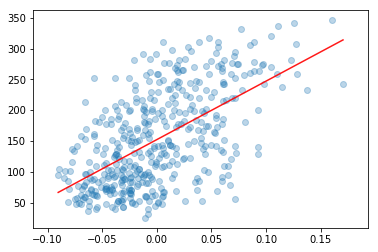

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               progress   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Thu, 04 Oct 2018   Prob (F-statistic):           3.47e-42
Time:                        02:27:55   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
linreg(data.bmi, data.progress)

# ARIMA model

다음 데이터는 뉴욕의 우버 이용량 데이터 입니다.

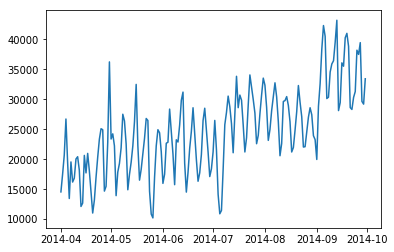

In [18]:
uber = pd.read_csv("uber.csv", index_col=0)
#Index의 data type을 string 타입에서 datetime 타입으로 전환합니다.
uber.index = pd.to_datetime(uber.index)
plt.plot(uber)
plt.show()

목요일과 금요일에 주기적으로 이용량이 높아짐을 알 수 있습니다. 주기가 7인 ARIMA 모델을 이용하여, 8-9월 두 달 동안의 uber 이용량 예측을 진행하세요. 먼저, 실습 자료를 참고하여 매개변수인 p,d,q를 정하세요.

In [21]:
import itertools
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [22]:
import warnings

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = pd.DataFrame({"param":[], "param_seasonal":[], "aic":[]})
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(uber,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            TEMP = pd.DataFrame({"param":[param], "param_seasonal":[param_seasonal], "aic":[results.aic]})
            AIC  = pd.concat([AIC, TEMP]).reset_index(drop=True)
        except:
            continue
AIC.sort_values("aic").head(5)

,param,param_seasonal,aic
27,"(0, 1, 1)","(0, 1, 1, 7)",3152.432841
31,"(0, 1, 1)","(1, 1, 1, 7)",3154.404799
59,"(1, 1, 1)","(0, 1, 1, 7)",3160.709110
63,"(1, 1, 1)","(1, 1, 1, 7)",3162.231361
43,"(1, 0, 1)","(0, 1, 1, 7)",3174.551997


위에서 찾은 매개변수를 이용하여, ARIMA 분석을 진행해보세요.

In [23]:
mod = sm.tsa.statespace.SARIMAX(uber,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

pred = results.get_prediction(start=pd.to_datetime('2014-08-01'), dynamic=False)
pred_ci = pred.conf_int()

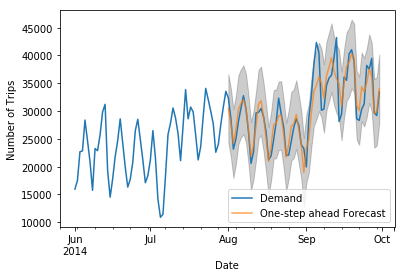

In [24]:
ax = uber['2014-06-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Trips')
plt.legend(loc="lower right")
plt.show()
